#Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the dataset

In [5]:
advertising = pd.read_csv("advertising.csv")

In [6]:
df = pd.DataFrame(advertising)

In [7]:
df = pd.DataFrame(advertising)

In [8]:
#inspecting the dataset

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
df.shape

(200, 4)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
# plotting the scattered graph for TV,Radio,Newspaper

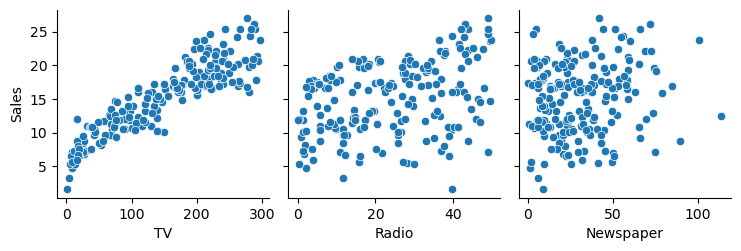

In [14]:
sns.pairplot(diag_kind=None, data= advertising, x_vars=["TV","Radio","Newspaper"], y_vars="Sales")
plt.show()

In [15]:
# plotting the HeatMap

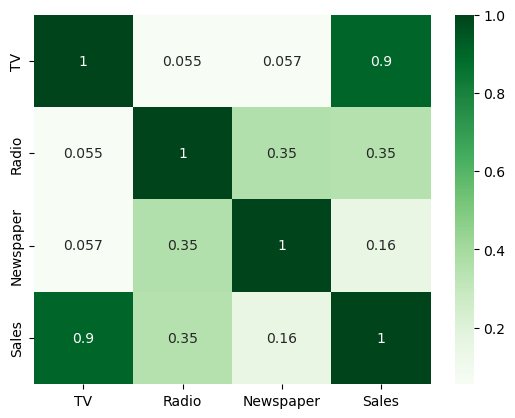

In [16]:
sns.heatmap(df.corr(), cmap="Greens", annot=True)
plt.show()

In [17]:
X=df[["TV","Radio","Newspaper"]]
y=df["Sales"]

In [18]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [19]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
# importing the statsmodel

In [21]:
import statsmodels
import statsmodels.api as sm

In [22]:
#importing the sklearn

In [23]:
import sklearn
from sklearn.model_selection import train_test_split

In [24]:
#dividing the data into training and test data

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size= 0.7, random_state= 100)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [27]:
X_train_sm= sm.add_constant(X_train)

In [28]:
X_train_sm

,const,TV,Radio,Newspaper
74,1.0,213.4,24.6,13.1
3,1.0,151.5,41.3,58.5
185,1.0,205.0,45.1,19.6
26,1.0,142.9,29.3,12.6
90,1.0,134.3,4.9,9.3
...,...,...,...,...
87,1.0,110.7,40.6,63.2
103,1.0,187.9,17.2,17.9
67,1.0,139.3,14.5,10.2
24,1.0,62.3,12.6,18.3


In [29]:
X_train_sm = pd.DataFrame(X_train_sm)
y_train = pd.Series(y_train)

In [30]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [31]:
lr.params

const        4.334596
TV           0.053829
Radio        0.110012
Newspaper    0.006290
dtype: float64

In [32]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           4.73e-71
Time:                        13:51:05   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.000       3.628       5.041
TV             0.0538      0.002     34.539      0.000       0.051       0.057
Radio          0.1100      0.010     10.609      0.000       0.090       0.131
Newspaper      0.0063      0.007      0.902      0.369      -0.008       0.020
==============================================================================
Omnibus:                       18.669   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                          -0.643   Prob(JB):                     1.52e-07
Kurtosis:                       4.932   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
y_predicted = lr.predict(X_train_sm)

In [34]:
y_predicted

74     18.610427
3      17.401174
185    20.454398
26     15.329388
90     12.161402
         ...    
87     15.157500
103    16.453886
67     13.492326
24      9.189410
8       5.034842
Length: 140, dtype: float64

In [35]:
res= (y_train-y_predicted)

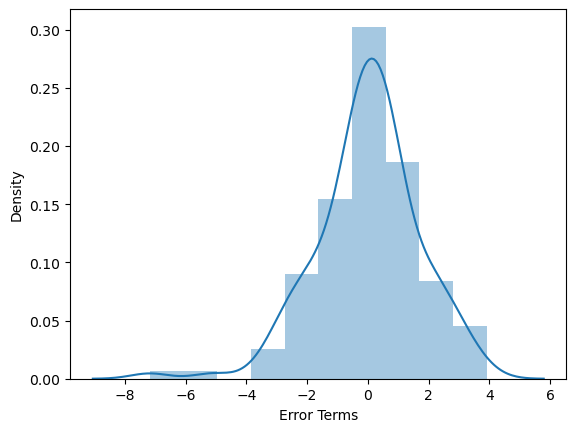

In [36]:
sns.distplot(res, bins=10)
plt.xlabel("Error Terms")
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
print(y_pred)

[ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [39]:
print('Train Score: ', model.score(X_train, y_train))
print('Test Score: ', model.score(X_test, y_test))

Train Score:  0.91049938193816
Test Score:  0.8655979373420272


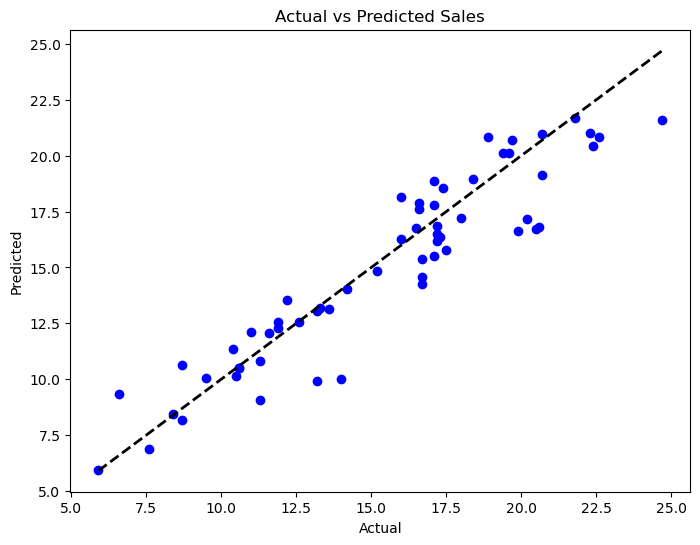

In [40]:
# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# pred. on test data
y_pred = model.predict(X_test)

# r^2 error
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))


R-squared: 0.8655979373420272
Mean Squared Error: 1.6235998775338911
